In [1]:
import sys
import os
import numpy as np
from keras.initializers import he_uniform

# Import custom model function
from models.unet import unet_model
# Import custom functions
from demoModel import extractImageFromFits, extractPixelMaskFromFits, stackImages, extractStarPredictions, showPredictionOverlay, showPredictionComparison

2024-12-02 21:19:46.887549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 21:19:48.084216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the image for testing
test_image = np.load('test_image.npy')
print("Test image shape: ", test_image.shape)

Test image shape:  (512, 512, 3)


In [3]:
# Select the image to display
display_image = test_image[:, :, 0]
print("Display image shape: ", display_image.shape)

Display image shape:  (512, 512)


In [4]:
# Load the trained model weights
model_weights = "FINAL_2024_11_29-0023_24_unet_model_chris_model_weights.h5"

In [5]:
# Define hyperparameters
hyperparameters = {
    'input_shape': (512, 512, 3),
    'filters': [64, 128, 256, 512, 1024],
    'kernel_size': (3, 3),
    'activation': 'relu',
    'padding': 'same',
    'initializer': he_uniform
}

# Create and compile the model using hyperparameters
model = unet_model(
    input_shape=hyperparameters['input_shape'],
    filters=hyperparameters['filters'],
    kernel_size=hyperparameters['kernel_size'],
    activation=hyperparameters['activation'],
    padding=hyperparameters['padding'],
    initializer=hyperparameters['initializer']
)

# Load the saved model weights
model.load_weights(model_weights)

2024-12-02 21:19:50.650939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 21:19:50.889795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 21:19:50.889876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 21:19:50.898447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-02 21:19:50.898516: I tensorflow/compile

In [6]:
pred_star_data, prediction_mask = extractStarPredictions(model.predict(np.expand_dims(test_image, axis=0))[0], threshold=0.5)

2024-12-02 21:19:52.883265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


1/1 [==============================] - 1s 1s/step


In [7]:
print("Number of stars detected:", len(pred_star_data))

Number of stars detected: 3987


1/1 [==============================] - 0s 30ms/step


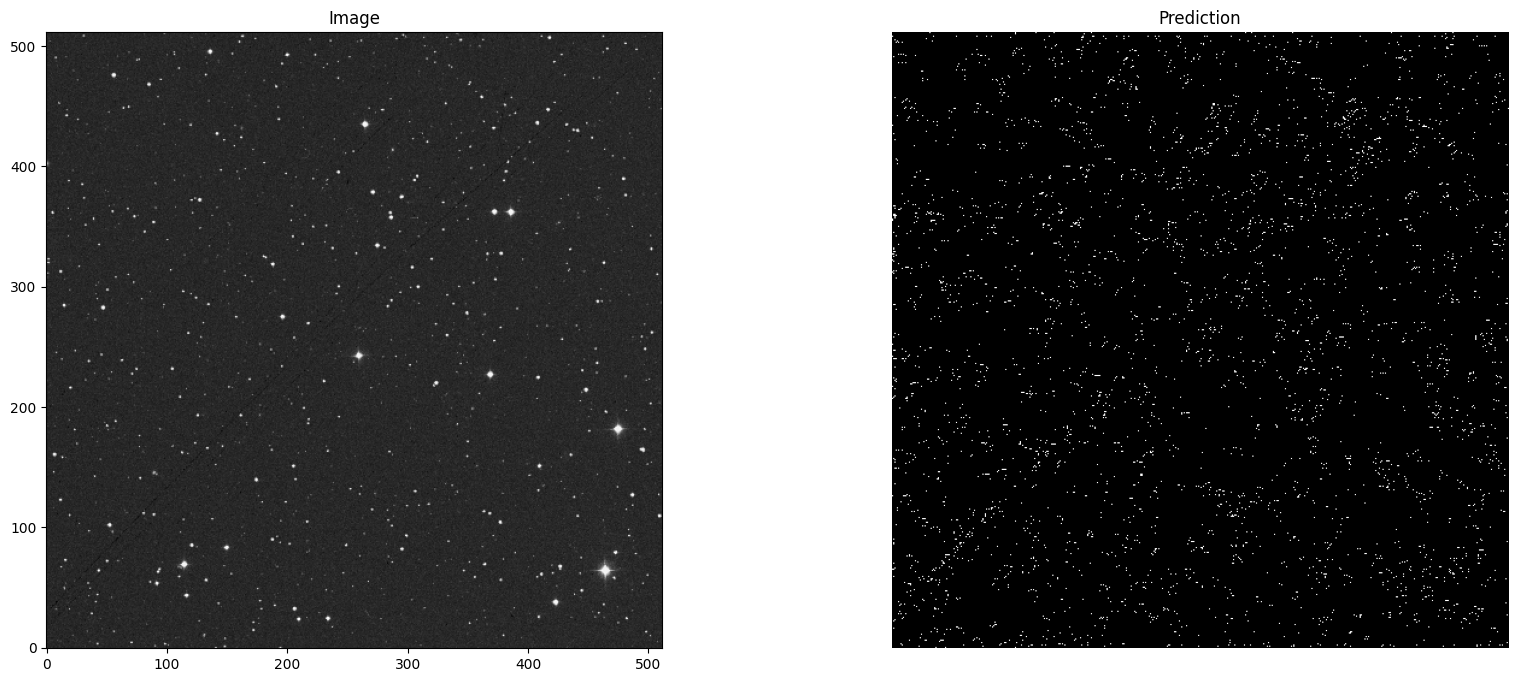

In [8]:
showPredictionComparison(display_image, test_image, model, threshold=0.5)

1/1 [==============================] - 0s 37ms/step


Number of stars detected: 3987


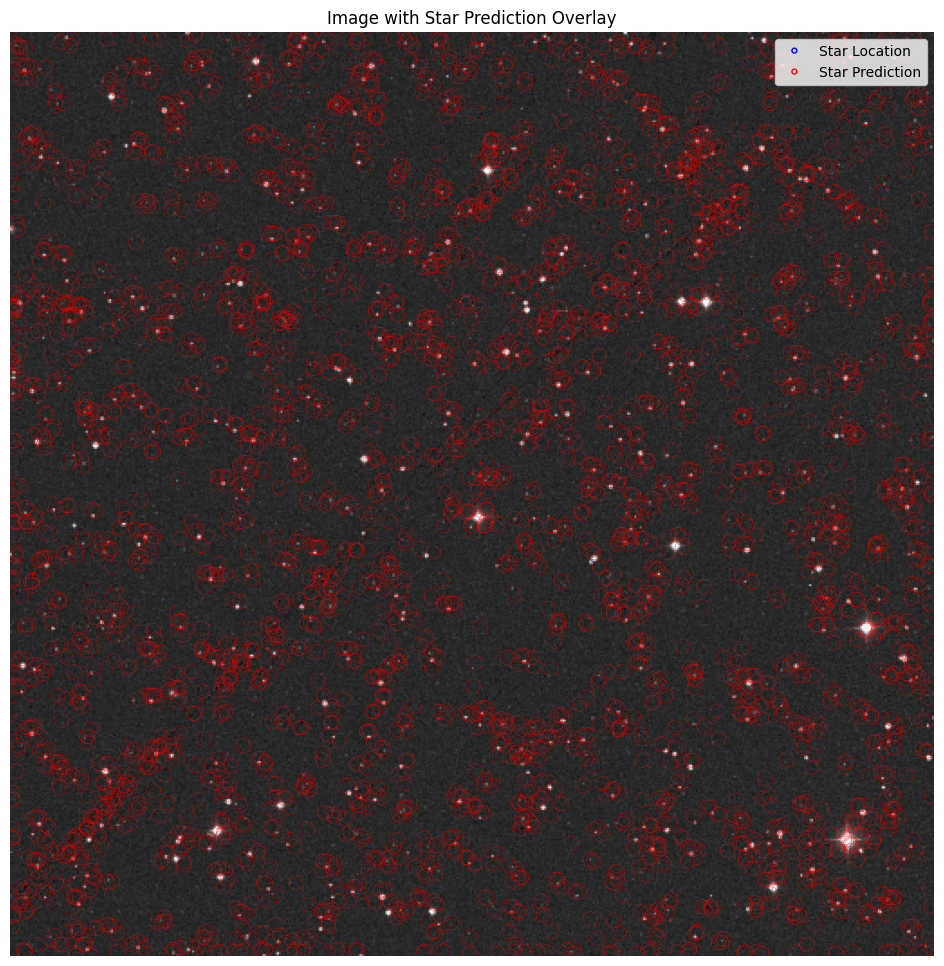

In [9]:
showPredictionOverlay(display_image, test_image, model, threshold=0.5)